In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# 한글폰트 사용을 위해 설치

import koreanize_matplotlib

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from matplotlib import rc
rc('font', family ='AppleGothic')

pd.set_option('display.max_columns', None) # 모든 열 출력

In [2]:
df = pd.read_csv('니켈data.csv', encoding = 'cp949')
df

,기준일,기준가격,광물종합지수,메이저금속지수,환율,시장전망지표,무역수지,수출 중량,수출 금액,수입 중량,수입 금액,수급안정화지수
0,2021-06-09,18088,2407.510943,2494.113774,1116.890015,12.57,-26962.0,0.0,0.0,311072.1,26962.0,12.08
1,2021-06-10,17783,2436.458355,2523.494802,1116.410034,12.57,-26962.0,0.0,0.0,311072.1,26962.0,12.08
2,2021-06-11,18303,2452.915918,2519.403176,1111.260010,12.57,-26962.0,0.0,0.0,311072.1,26962.0,12.08
3,2021-06-14,18276,2498.367968,2567.594194,1115.550049,12.57,-26962.0,0.0,0.0,311072.1,26962.0,12.08
4,2021-06-15,17909,2496.551463,2564.669309,1116.319946,12.57,-26962.0,0.0,0.0,311072.1,26962.0,12.08
...,...,...,...,...,...,...,...,...,...,...,...,...
739,2024-05-14,18940,2904.495116,2537.347341,1363.790039,36.40,NaN,NaN,NaN,NaN,NaN,36.40
740,2024-05-15,19050,2883.468771,2535.818450,1362.550049,36.40,NaN,NaN,NaN,NaN,NaN,36.40
741,2024-05-16,19335,2908.732163,2555.724912,1353.599976,36.40,NaN,NaN,NaN,NaN,NaN,36.40
742,2024-05-17,20735,2923.022685,2575.030928,1346.040039,36.40,NaN,NaN,NaN,NaN,NaN,36.40


In [3]:
df['기준일'] = pd.to_datetime(df['기준일'])

# '기준일'을 인덱스로 설정
df.set_index('기준일', inplace=True)

### 상관관계

<AxesSubplot:>

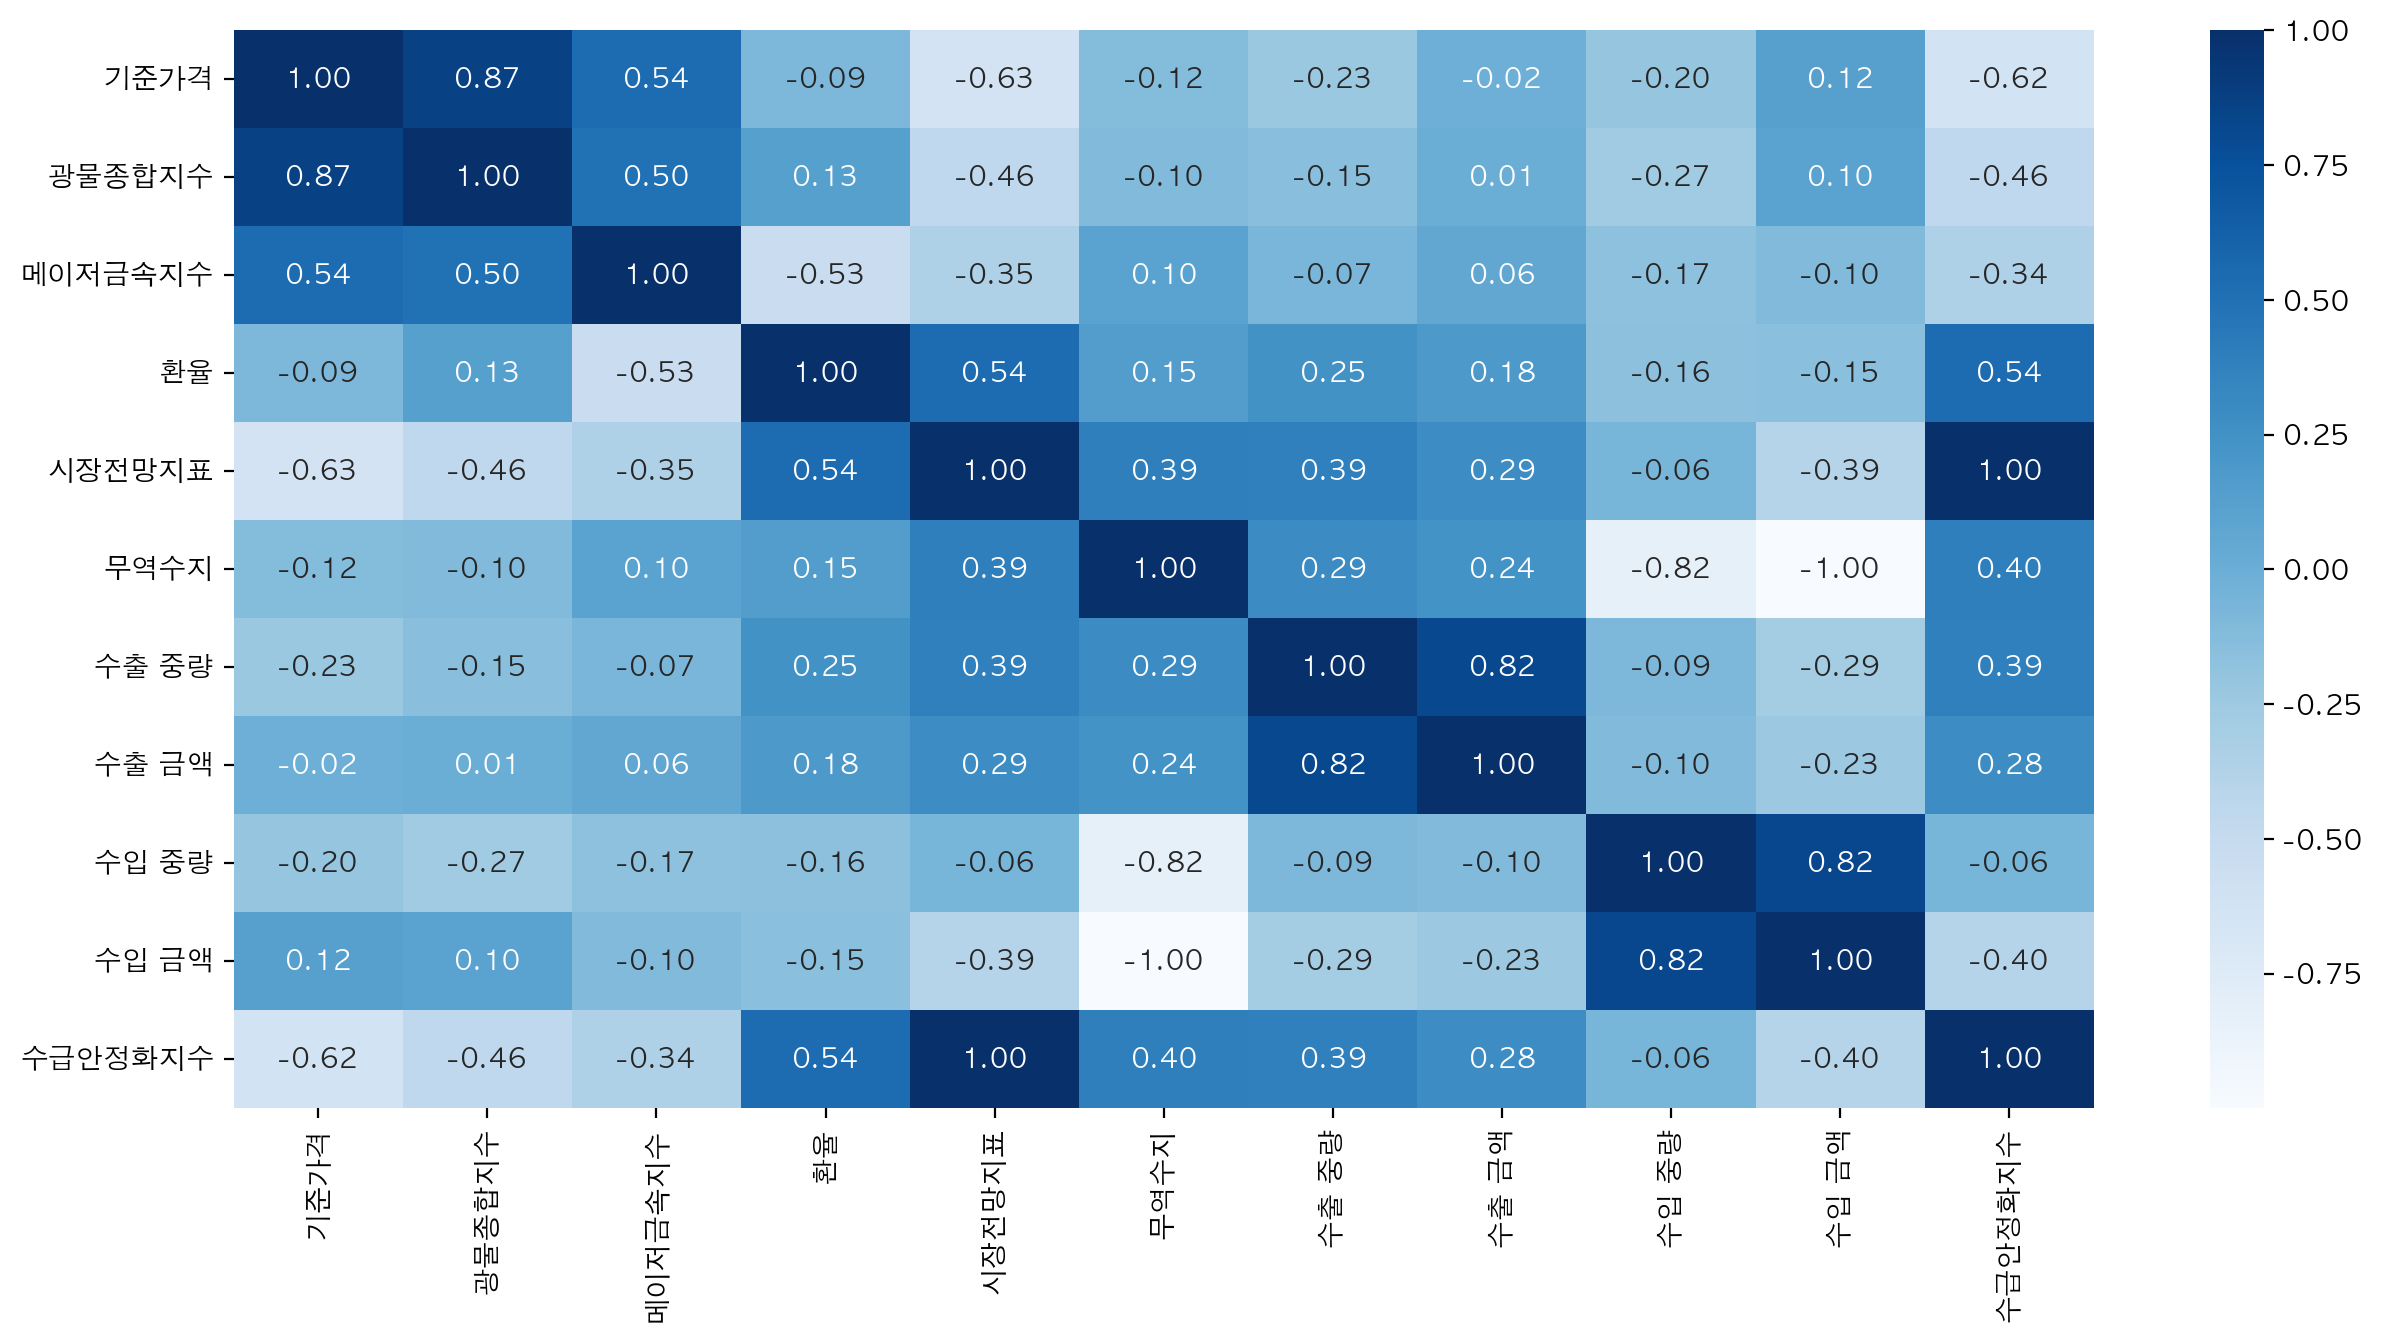

In [4]:
# 히트맵
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), cmap="Blues", annot=True, fmt=".2f")

- 니켈은 광물 종합지수와 0.87이라는 높은 상관계수를 보인다. 추가적인 EDA가 필요해보임
- 수급안정화지수와 시장전망지표는 1이라는 상관계수. 둘 중 하나만 선택할 필요성 o 
- 메이저 금속지수와 0.54라는 높은 상관계수를 보임

### 기준가격 plot

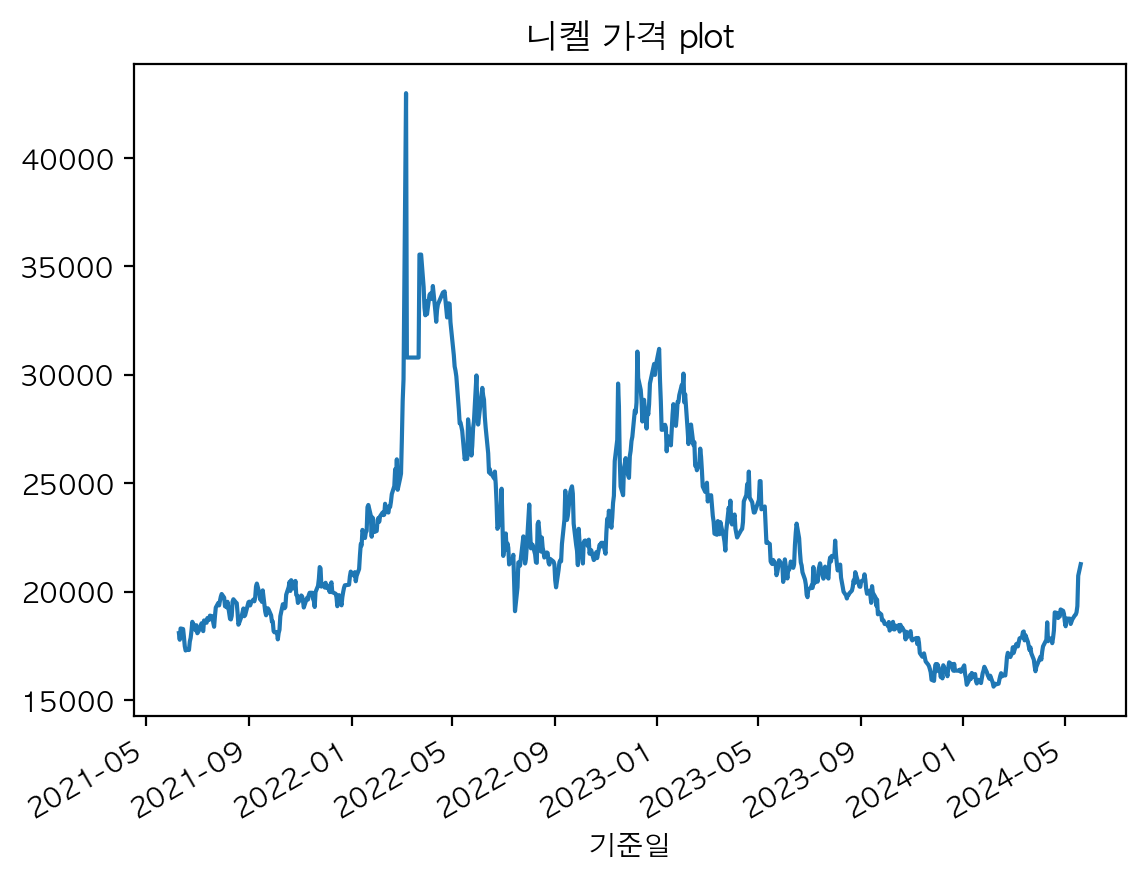

In [5]:
df['기준가격'].plot()
plt.title('니켈 가격 plot')
plt.show()

In [6]:
# 기준가격이 최고점을 찍었을 때 일자 2022-03-07
df['기준가격'].idxmax()

Timestamp('2022-03-07 00:00:00')

- 2022년 3월 7일에 최고점을 찍고 폭락하는 추세
- 이에 대한 원인을 찾아본 결과 인도네시아의 계속되는 니켈 공급 증가로 인해 가격이 하락한다는 뉴스 기사 발견
- 현재 니켈 가격은 서서히 증가하고 있음
- 외부 요인을 알아낼 수 있는 데이터가 필요함. ex)뉴스데이터

### 니켈 가격과 환율 사이의 관계

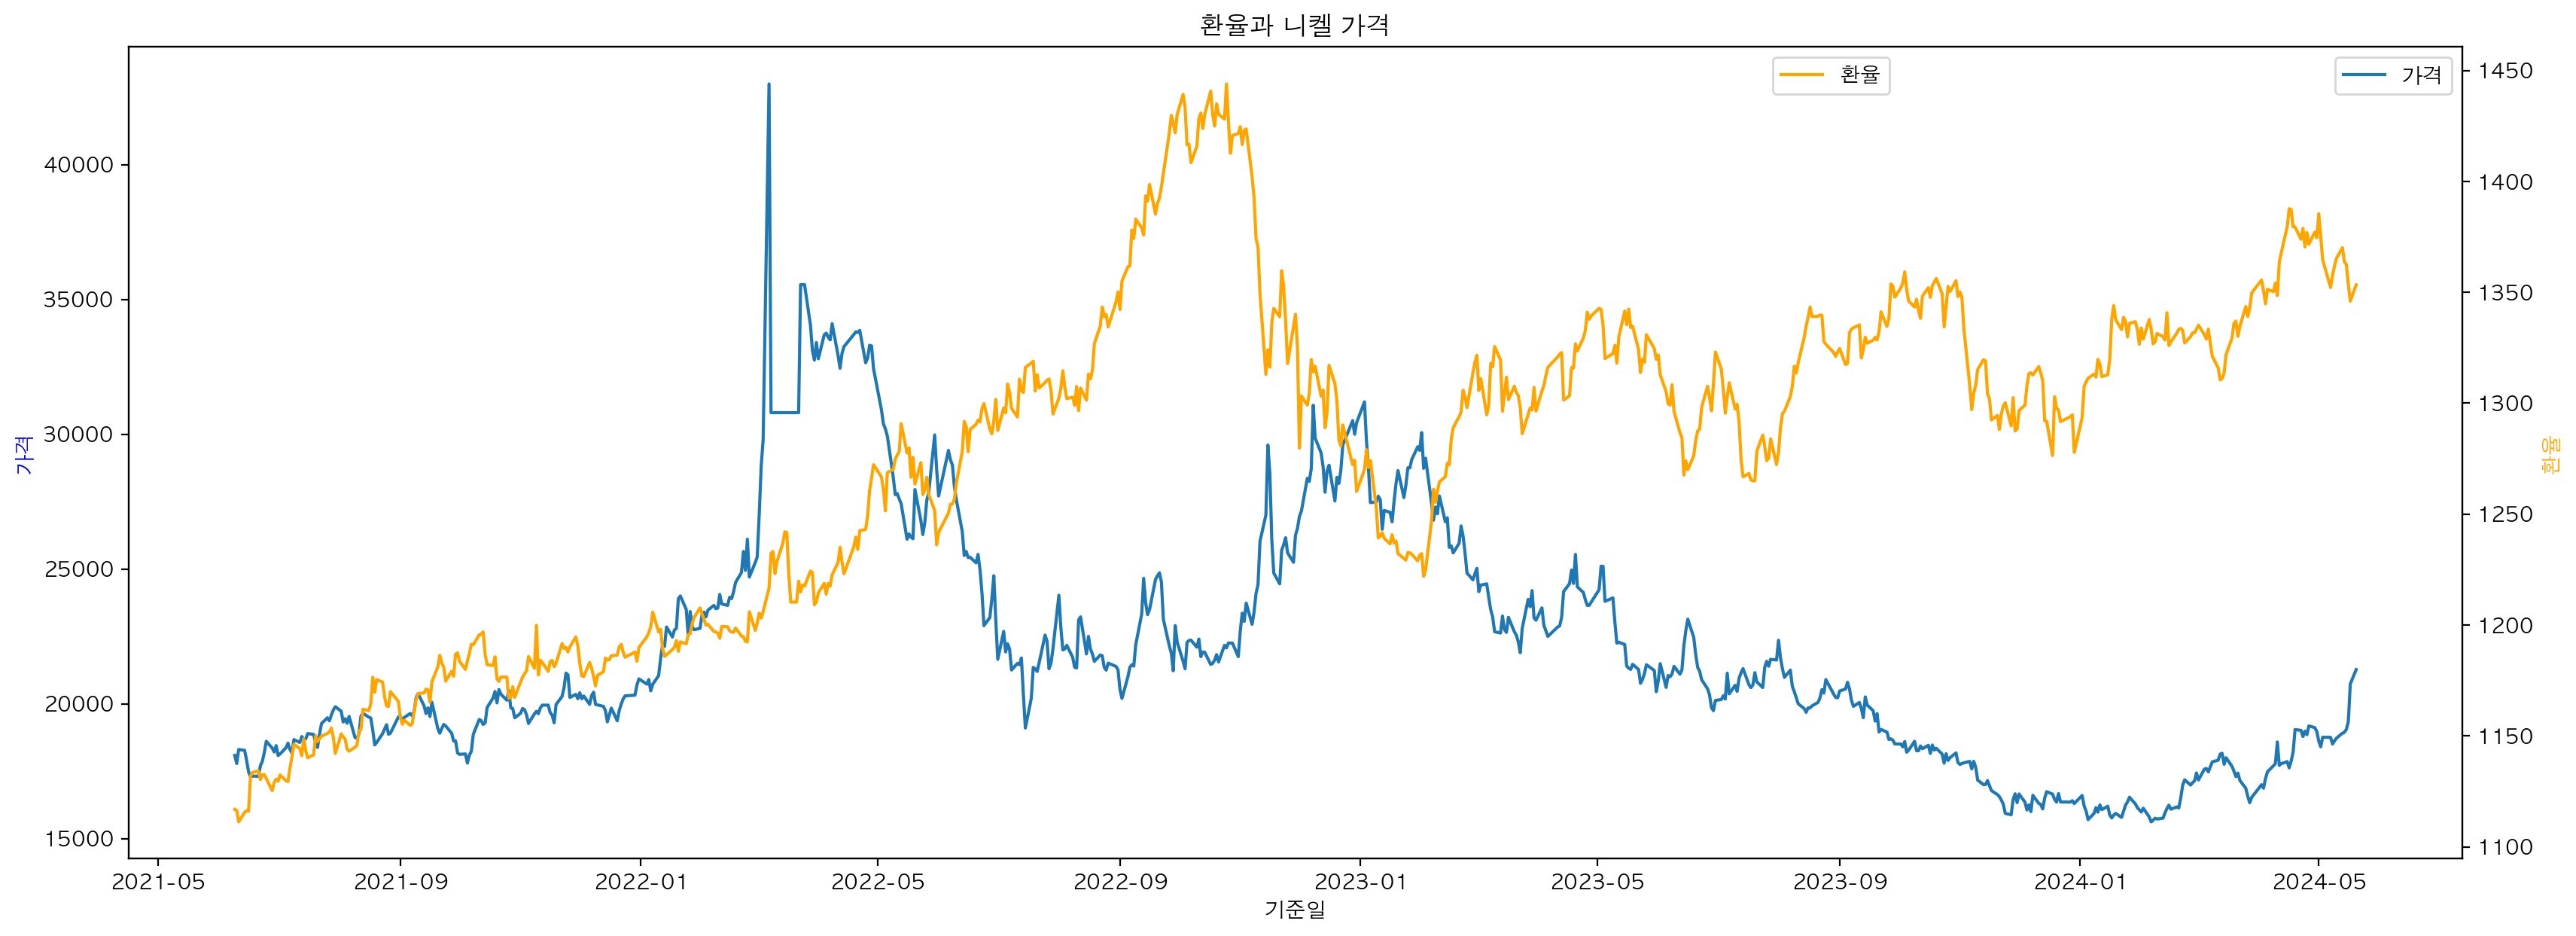

In [10]:
plt.figure(figsize=(20, 7))
# 기준가격에 대한 선 그래프 (왼쪽 y축 사용)
ax1 = sns.lineplot( x=df.index, y='기준가격', data=df, label='가격', ci = None)

# 오른쪽 y축 설정
ax2 = ax1.twinx()

# 환율에 대한 선 그래프 (오른쪽 y축 사용)
sns.lineplot(x=df.index, y='환율', data=df, color='orange', label='환율', ax=ax2, ci = None)

# 각 y축에 대한 레이블 설정
ax1.set_ylabel('가격', color='blue')
ax2.set_ylabel('환율', color='orange')
# 타이틀과 범례 설정
plt.title('환율과 니켈 가격')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1.0))

# x축 레이블 설정
plt.xlabel('기준일')

# 그래프 표시
plt.show()

- 니켈과 환율 사이 상관관계 : -0.09
- 낮은 상관관계와 달리 그래프 확인 결과 관계가 있어보임
- 환율이 고점을 찍을 때 (2022년 9월 부근) 니켈 가격은 저점을 찍는 것을 알 수 있음
- 환율이 하락을 시작할 때 가격은 상승하는 모습을 보이며 반대의 추세를 보여줌.
- 두 변수가 서로 영향을 미치는 것 같음.

### 시장전망지표 vs 수급안정화지수

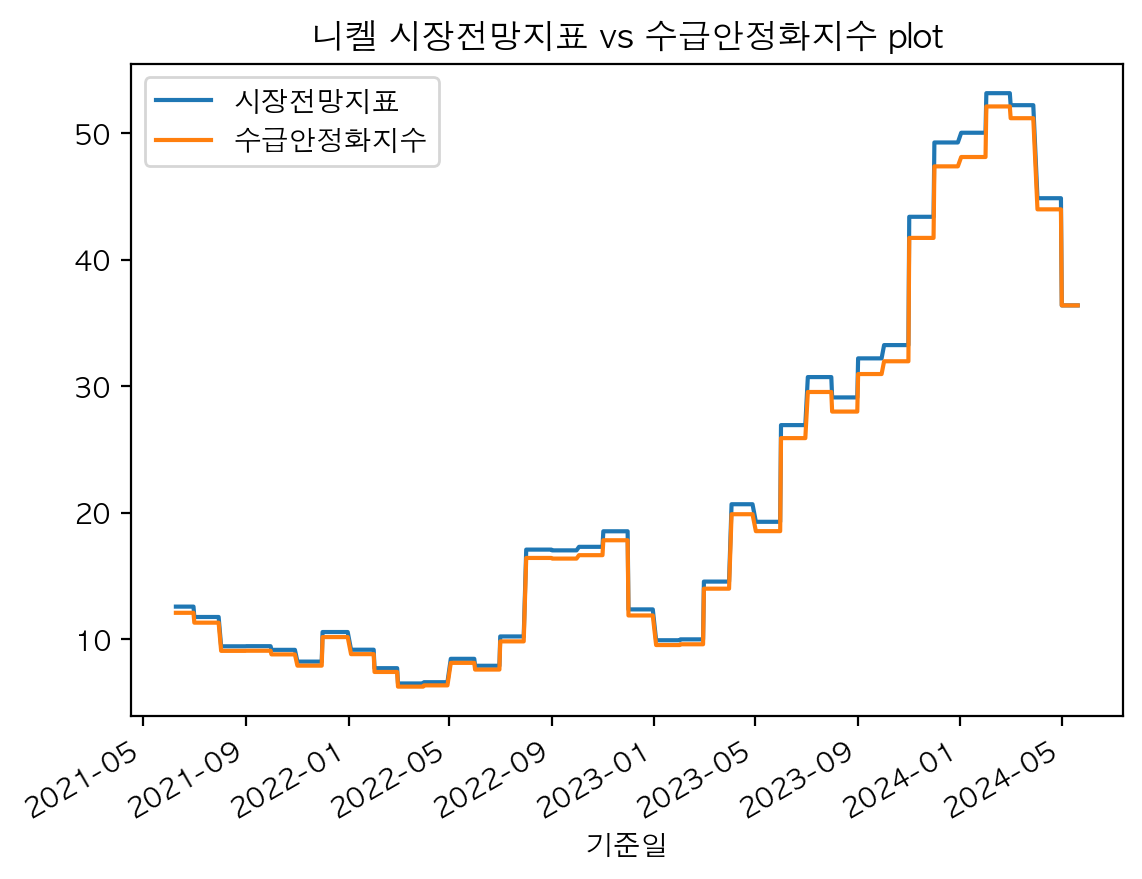

In [9]:
df[['시장전망지표','수급안정화지수']].plot()
plt.title('니켈 시장전망지표 vs 수급안정화지수 plot')
plt.show()

- 시장전망지표와 수급안정화지수의 상관관계는 1
- 그래프 확인 결과 흐름도 똑같은 것을 알 수 있음. 따라서 두 변수 중 하나만 써도 충분하다 판단.
- 니켈의 수급현황은 현재 점점 안좋아지고 있음.

### 니켈 가격과 메이저금속지수 관계 확인

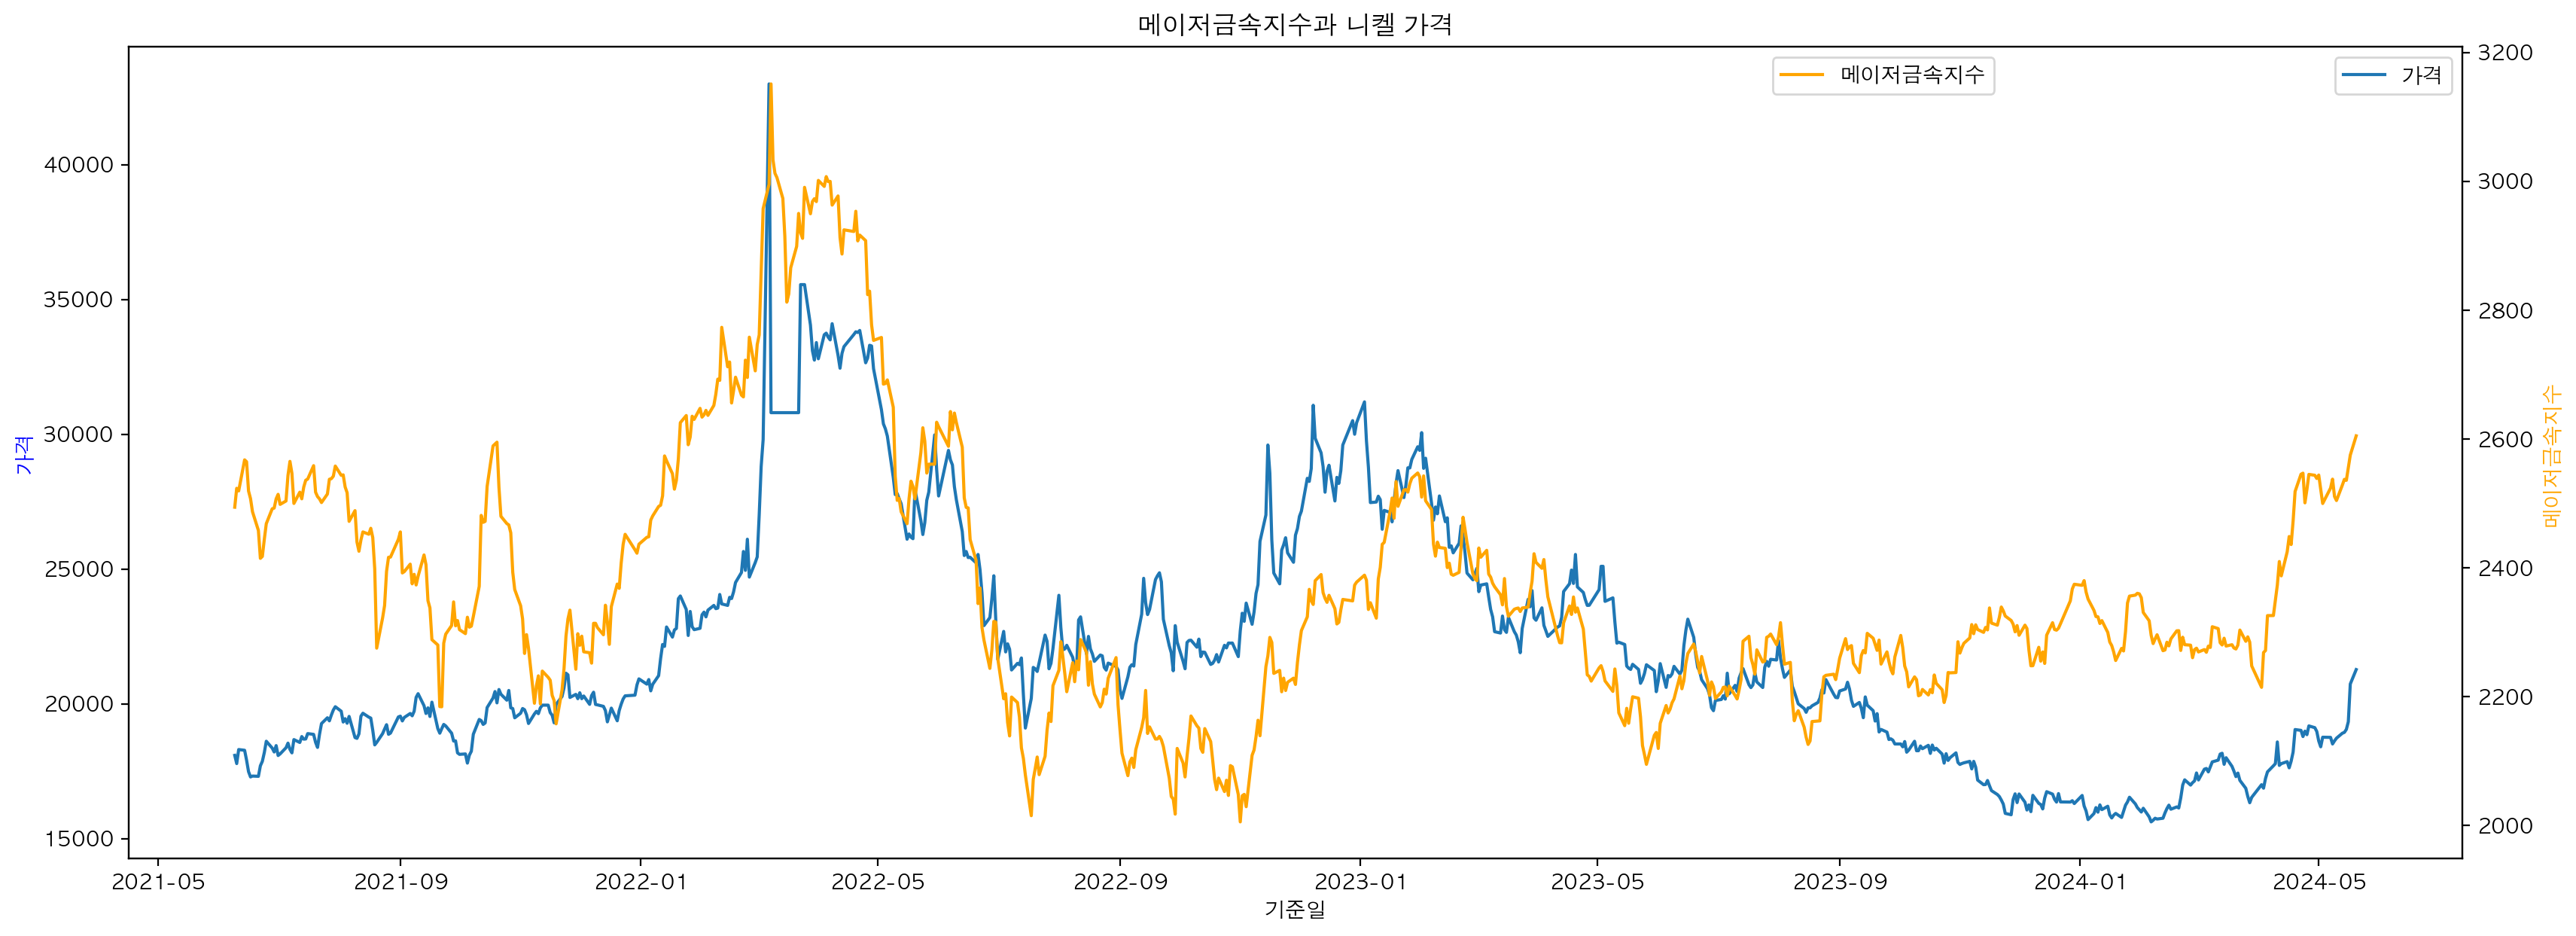

In [11]:
plt.figure(figsize=(20, 7))
# 기준가격에 대한 선 그래프 (왼쪽 y축 사용)
ax1 = sns.lineplot( x=df.index, y='기준가격', data=df, label='가격', ci = None)

# 오른쪽 y축 설정
ax2 = ax1.twinx()

# 메이저금속지수에 대한 선 그래프 (오른쪽 y축 사용)
sns.lineplot(x=df.index, y='메이저금속지수', data=df, color='orange', label='메이저금속지수', ax=ax2, ci = None)

# 각 y축에 대한 레이블 설정
ax1.set_ylabel('가격', color='blue')
ax2.set_ylabel('메이저금속지수', color='orange')
# 타이틀과 범례 설정
plt.title('메이저금속지수과 니켈 가격')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1.0))

# x축 레이블 설정
plt.xlabel('기준일')

# 그래프 표시
plt.show()